## Part 2 - Hands-on - scikit learn

The objective of this notebook is get hands on with Scikit-learn and demonstrate their usage in preprocessing and modeling tasks using the Titanic dataset.

#### Reminder from 1_Pandas

The Titanic dataset contains information about passengers aboard the Titanic, including features such as age, sex, ticket class, and whether they survived the disaster.

In [1]:
# Importing necessary libraries
import pandas as pd  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  

c:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


1. **Data Loading and Exploration:**
   - Load the Titanic dataset into a pandas DataFrame.
   - Display basic information about the dataset (e.g., data types, missing values, summary statistics).
   - Explore the distribution of the target variable (`Survived`).


In [2]:
# Task 1: Data Loading and Exploration
# Load the Titanic dataset
titanic_df = pd.read_csv('../dataset/titanic/train.csv')

In [3]:
# Display basic information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived'>

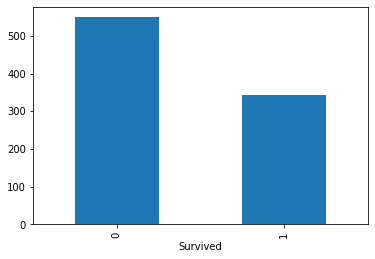

In [5]:
# Explore the distribution of the target variable (Survived)
titanic_df['Survived'].value_counts().plot(kind='bar')  

2. **Data Preprocessing:**
   - Handle missing values in the dataset (e.g., drop unnecessary columns, impute missing values).
   - Encode categorical variables using one-hot encoding.
   - Split the dataset into features (X) and target variable (y).

In [6]:
# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
# Define columns that you want to impute and encode  
num_features = ['Age', 'Fare']  
cat_features = ['Sex', 'Embarked', 'Pclass']  

In [51]:
# Create the transformers for the pipeline  
num_transformer = SimpleImputer(strategy='median')  
cat_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])  

In [52]:
# Combine transformers into a preprocessor with ColumnTransformer  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', num_transformer, num_features),  
        ('cat', cat_transformer, cat_features)  
    ])

In [53]:
# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop('Survived', axis=1)  
y = titanic_df['Survived']

In [54]:
# Split the preprocessed dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

3. **Building a Pipeline:**
   - Create a Scikit-learn pipeline that includes preprocessing steps (imputation, encoding) and a machine learning model.
   - Choose a machine learning model (e.g., Logistic Regression, Decision Tree, Random Forest Classifier) and include it in the pipeline.


In [55]:
# Create a Scikit-learn pipeline
model = RandomForestClassifier(n_estimators=100, random_state=42)  
pipeline = Pipeline(steps=[('preprocessor', preprocessor),  
                           ('model', model)])

In [56]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('model', RandomForestClassifier(random_state=42))])

4. **Training and Evaluation:**
   - Split the preprocessed dataset into training and validation sets.
   - Fit the pipeline on the training data.
   - Evaluate the pipeline on the validation data using accuracy score and classification report.

In [61]:
# Evaluate the pipeline on the validation data
y_pred = pipeline.predict(X_val)  
print(f"Accuracy Score: {accuracy_score(y_val, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Accuracy Score: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



5. **Parameter Tuning (Optional):**
   - Experiment with different parameters of the pipeline components (e.g., model hyperparameters, imputation strategy).
   - Use techniques like GridSearchCV to find the best combination of parameters.

In [66]:
# Define parameter grid for GridSearchCV
param_grid = {  
    'model__n_estimators': [50, 100, 200],  
    'model__max_depth': [None, 5, 10, 20],  
    'preprocessor__num__strategy': ['mean', 'median']
    # Add other parameters if desired
}

In [67]:
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  
grid_search.fit(X_train, y_train)  
print(f"Best params: {grid_search.best_params_}")  
print(f"Best cross-validation score: {grid_search.best_score_}")  

Best params: {'model__max_depth': 5, 'model__n_estimators': 50, 'preprocessor__num__strategy': 'median'}
Best cross-validation score: 0.821609376538954


In [68]:
print("\nBest Parameters after Grid Search:")
print(grid_search.best_params_)
print("Best Model Score:")
print(grid_search.best_score_)


Best Parameters after Grid Search:
{'model__max_depth': 5, 'model__n_estimators': 50, 'preprocessor__num__strategy': 'median'}
Best Model Score:
0.821609376538954


In [74]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__n_estimators,param_preprocessor__num__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.094872,0.004405,0.010008,0.000020,5,50,median,"{'model__max_depth': 5, 'model__n_estimators':...",0.811189,0.846154,0.830986,0.767606,0.852113,0.821609,0.030482,1
6,0.182442,0.074833,0.015149,0.006714,5,50,mean,"{'model__max_depth': 5, 'model__n_estimators':...",0.811189,0.846154,0.838028,0.767606,0.845070,0.821609,0.029824,2
10,0.433112,0.148222,0.021819,0.002780,5,200,mean,"{'model__max_depth': 5, 'model__n_estimators':...",0.797203,0.839161,0.838028,0.774648,0.852113,0.820230,0.029325,3
11,0.368270,0.046426,0.019801,0.000406,5,200,median,"{'model__max_depth': 5, 'model__n_estimators':...",0.797203,0.839161,0.830986,0.774648,0.859155,0.820230,0.030322,4
13,0.120490,0.002302,0.011399,0.001488,10,50,median,"{'model__max_depth': 10, 'model__n_estimators'...",0.790210,0.790210,0.845070,0.809859,0.859155,0.818901,0.028402,5
15,0.271689,0.089796,0.014703,0.001574,10,100,median,"{'model__max_depth': 10, 'model__n_estimators'...",0.783217,0.804196,0.838028,0.816901,0.852113,0.818891,0.024341,6
17,0.506172,0.101432,0.025394,0.007396,10,200,median,"{'model__max_depth': 10, 'model__n_estimators'...",0.783217,0.811189,0.838028,0.823944,0.838028,0.818881,0.020445,7
9,0.262421,0.096391,0.021019,0.010131,5,100,median,"{'model__max_depth': 5, 'model__n_estimators':...",0.797203,0.839161,0.838028,0.774648,0.845070,0.818822,0.027894,8
14,0.275427,0.042444,0.020215,0.010411,10,100,mean,"{'model__max_depth': 10, 'model__n_estimators'...",0.804196,0.797203,0.830986,0.816901,0.838028,0.817463,0.015444,9
16,0.504679,0.134294,0.026204,0.006609,10,200,mean,"{'model__max_depth': 10, 'model__n_estimators'...",0.797203,0.804196,0.823944,0.823944,0.838028,0.817463,0.014788,9
